In [1]:
# !pip install mglearn

In [2]:
import mglearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, load_breast_cancer

In [3]:
Xm, Ym= make_moons(n_samples= 100, noise= 0.25, random_state= 3)
Xm_train, Xm_test, Ym_train, Ym_test= train_test_split(Xm, Ym,
                                                       stratify= Ym,
                                                       random_state= 42)

In [4]:
cancer= load_breast_cancer()

In [5]:
x_train, x_test, y_train, y_test= train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state= 0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [7]:
bagging= BaggingClassifier(LogisticRegression(solver= 'liblinear'), 
                           n_estimators= 100, oob_score= True, n_jobs= -1, random_state= 42).fit(x_train, y_train)

In [8]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(x_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(x_test, y_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.948


In [9]:
from sklearn.tree import DecisionTreeClassifier
bagging= BaggingClassifier(DecisionTreeClassifier(), 
                           n_estimators= 5, oob_score= True, n_jobs= -1, random_state= 42).fit(Xm_train, Ym_train)

C:\Users\lju74\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\lju74\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44613 (\N{HANGUL SYLLABLE GING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


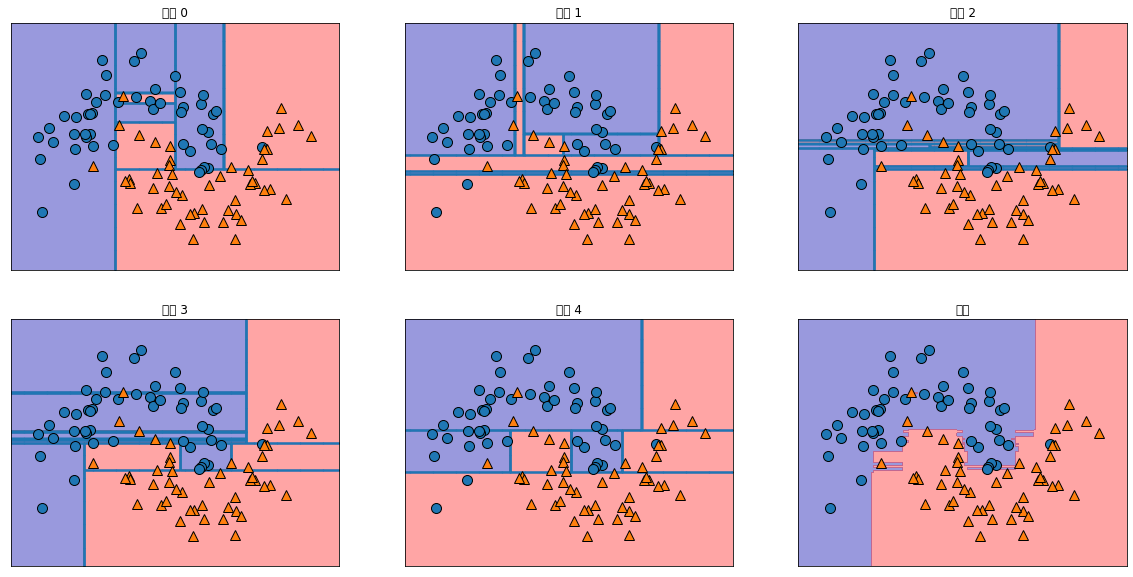

In [10]:
fig, axes= plt.subplots(2, 3, figsize= (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, Ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill= True, ax= axes[-1, -1], alpha= .4)
axes[-1, -1].set_title('배깅')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], Ym)
plt.show()

In [11]:
bagging= BaggingClassifier(DecisionTreeClassifier(), 
                           n_estimators= 100, oob_score= True, n_jobs= -1, random_state= 42).fit(x_train, y_train)

In [12]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(x_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(x_test, y_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


In [13]:
from sklearn.ensemble import ExtraTreesClassifier
x_tree= ExtraTreesClassifier( n_estimators= 5, n_jobs= -1, random_state= 0).fit(Xm_train, Ym_train)

C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50641 (\N{HANGUL SYLLABLE EG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


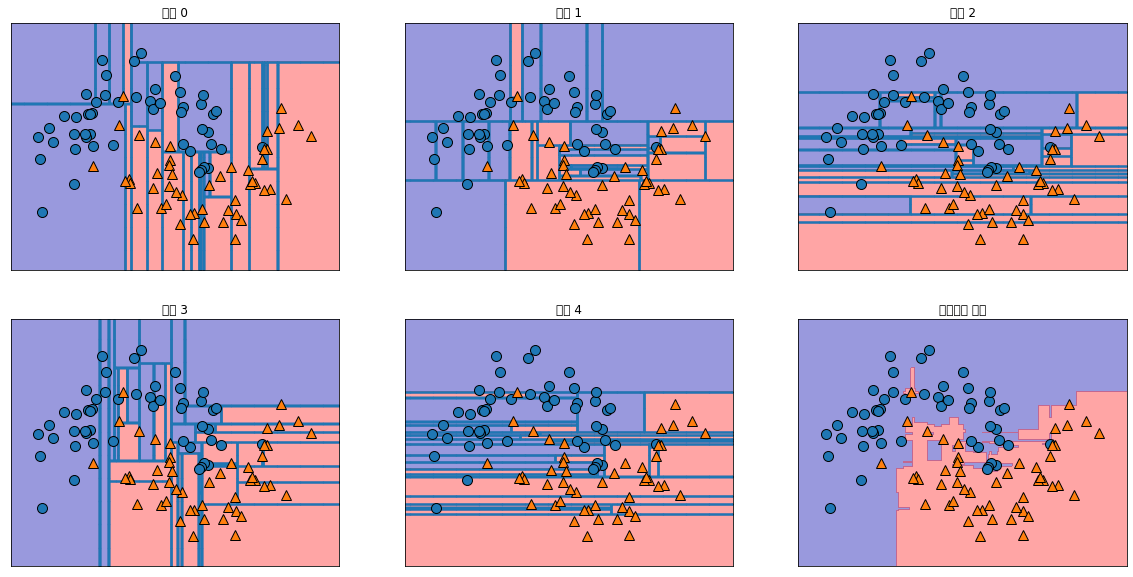

In [14]:
fig, axes= plt.subplots(2, 3, figsize= (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), x_tree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, Ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(x_tree, Xm, fill= True, ax= axes[-1, -1], alpha= .4)
axes[-1, -1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], Ym)
plt.show()

In [15]:
xtree= ExtraTreesClassifier( n_estimators= 100, n_jobs= -1, random_state= 0).fit(x_train, y_train)

In [16]:
print('훈련 세트 정확도: {:.3f}'.format(xtree.score(x_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lju74\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


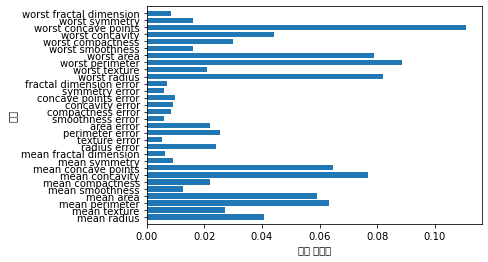

In [17]:
n_features= cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align= 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()